# Interpolacion de los numeros adimensionales
# Autores: Juan Andres Mendez G.,
# IMEC 3431: Procesos de manufactura industrial


> Carga de datos

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Use matplotlib's style settings
%pip install jupyterthemes
!jt -t chesterish
plt.style.use('dark_background')
# Load the data
steel_1040_carbide=pd.read_excel('data/example_data/Grupo 4.xlsx',sheet_name='Sheet4')
steel_1040_carbide.pop('Acero 1040 con Carburo de Tungsteno')
steel_1040_carbide.drop(steel_1040_carbide.index[0],inplace=True)
steel_1020_carbide=pd.read_excel('data/example_data/Grupo 4.xlsx',sheet_name='Sheet5')
steel_1020_carbide.pop('Acero 1020 con Carburo de Tungsteno')
steel_1020_carbide.drop(steel_1020_carbide.index[0],inplace=True)
machinist=pd.read_excel('data/example_data/Grupo 4.xlsx',sheet_name='Sheet6')
machinist.pop('Como el tornero lo hace')
machinist.drop(machinist.index[0],inplace=True)
steel_1040_fast=pd.read_excel('data/example_data/Grupo 4.xlsx',sheet_name='Sheet2')
steel_1040_fast.pop('Acero 1040 con Herramienta de acero rápido')
steel_1040_fast.drop(steel_1040_fast.index[0],inplace=True)
steel_1020_fast=pd.read_excel('data/example_data/Grupo 4.xlsx',sheet_name='Sheet3')
steel_1020_fast.pop('Acero 1020 con Herramienta de acero rápido')
steel_1020_fast.drop(steel_1020_fast.index[0],inplace=True)



Note: you may need to restart the kernel to use updated packages.


Visualizacion de las tablas

In [32]:
# Steel 1040 Carbide view
steel_1040_carbide.head()

#  Diámetro (mm)  Pc Profundidad (mm)   Lm Longitud (mm)  \
1  1.0           24.5                  2.0               50.0   
2  2.0           24.5                  2.0               50.0   
3  3.0           24.5                  3.0               50.0   
4  4.0           24.5                  3.0               50.0   
5  5.0           24.5                  5.0               50.0   

   Tiempo de carga y descarga (s)  T Tiempo de Operación (s)  \
1                           125.9                      265.2   
2                            76.2                      259.6   
3                           165.2                      295.3   
4                            57.2                      365.2   
5                            65.7                      394.2   

   Tiempo total de mecanizado (s)  Velocidad angular [1/S]  \
1                           391.1                    12.51   
2                           335.8                    12.51   
3                           460.5                    12.51   
4                           422.4                    12.51   
5                           459.9                    12.51   

   Av velocidad de avance (mm/s)  Vmr Volumen de material retirado (mm^3)  \
1                         0.1885                                 486827.1   
2                         0.1926                                 486827.1   
3                         0.1693                                 488555.0   
4                         0.1369                                 488555.0   
5                         0.1268                                 491775.1   

    Pi 1  Afiladas #     CHF $  Desgaste    Pi 2  Valor de venta $  \
1  0.602          1.0  3932.91      113.5  0.454           10000.0   
2  0.602          1.0  4483.86      214.3  0.211           10000.0   
3  0.600          1.0  3719.31      135.2  0.403           12000.0   
4  0.600          1.0  5014.58      245.2  0.165           12000.0   
5  0.596          2.0  2485.71       98.3  0.829           15000.0   

   Valor producción $   Pi 3  
1               7108.0  1.41  
2               7093.0  1.41  
3               7127.0  1.68  
4               7117.0  1.69  
5               7127.0  2.10

In [33]:
# Steel 1040 Fast view
steel_1040_fast.head()

#  Diámetro (mm)  Pc Profundidad (mm)   Lm Longitud (mm)  \
1  1.0           24.5                  2.0               50.0   
2  2.0           24.5                  2.0               50.0   
3  3.0           24.5                  3.0               50.0   
4  4.0           24.5                  3.0               50.0   
5  5.0           24.5                  5.0               50.0   

   Tiempo de carga y descarga (s)  T Tiempo de Operación (s)  \
1                          158.20                     349.50   
2                          172.60                     429.74   
3                          154.88                     354.60   
4                           43.95                     347.10   
5                           43.90                     406.80   

   Tiempo total de mecanizado (s)  Velocidad angular [1/S]  \
1                          507.70                    12.51   
2                          602.34                    12.51   
3                          509.48                    12.51   
4                          391.05                    12.51   
5                          450.70                    12.51   

   Av velocidad de avance (mm/s)  Vmr Volumen de material retirado (mm^3)  \
1                         0.1431                                 486827.1   
2                         0.1163                                 486827.1   
3                         0.1410                                 488555.0   
4                         0.1441                                 488555.0   
5                         0.1229                                 491775.1   

    Pi 1  Afiladas #     CHF $  Desgaste    Pi 2  Valor de venta $  \
1  0.602          1.0  3992.71     137.21  0.370           10000.0   
2  0.602          1.0  4138.02     285.68  0.171           10000.0   
3  0.600          1.0  4036.82     260.93  0.192           12000.0   
4  0.600          2.0  2574.07     203.12  0.387           12000.0   
5  0.596          2.0  2617.53     162.67  0.476           15000.0   

   Valor producción $   Pi 3  
1               7140.0  1.40  
2               7166.0  1.40  
3               7141.0  1.68  
4               7108.0  1.69  
5               7124.0  2.11

In [34]:
# Steel 1020 Fast view
steel_1020_fast.head()

#  Diámetro (mm)  Pc Profundidad (mm)   Lm Longitud (mm)  \
1  1.0           24.5                  2.0               50.0   
2  2.0           24.5                  2.0               50.0   
3  3.0           24.5                  3.0               50.0   
4  4.0           24.5                  3.0               50.0   
5  5.0           24.5                  5.0               50.0   

   Tiempo de carga y descarga (s)  T Tiempo de Operación (s)  \
1                           106.7                      108.3   
2                            59.8                      156.1   
3                           102.4                      232.4   
4                            38.5                      189.5   
5                            34.0                      331.1   

   Tiempo total de mecanizado (s)  Velocidad angular [1/S]  \
1                           215.0                    25.03   
2                           215.9                    25.03   
3                           334.8                    25.03   
4                           228.0                    25.03   
5                           365.1                    25.03   

   Av velocidad de avance (mm/s)  Vmr Volumen de material retirado (mm^3)  \
1                         0.4617                                 486827.1   
2                         0.3203                                 486827.1   
3                         0.2151                                 488555.0   
4                         0.2639                                 488555.0   
5                         0.1510                                 491775.1   

    Pi 1  Afiladas #     CHF $  Desgaste    Pi 2  Valor de venta $  \
1  0.602          3.0   973.86     521.49  0.399           10000.0   
2  0.602          4.0  1048.38     384.46  0.502           10000.0   
3  0.600          3.0  1342.02      60.74  2.484           12000.0   
4  0.600          3.0  1606.87     122.73  1.027           12000.0   
5  0.596          4.0  1314.97     145.21  1.061           15000.0   

   Valor producción $   Pi 3  
1               7059.0  1.42  
2               7060.0  1.42  
3               7092.0  1.69  
4               7063.0  1.70  
5               7101.0  2.11

In [35]:
# Steel 1020 Carbide view
steel_1020_carbide.head()

#  Diametro (mm)  Pc Profundidad (mm)   Lm Longitud (mm)  \
1  1.0           24.5                  2.0               50.0   
2  2.0           24.5                  2.0               50.0   
3  3.0           24.5                  3.0               50.0   
4  4.0           24.5                  3.0               50.0   
5  5.0           24.5                  5.0               50.0   

   Tiempo de carga y descarga (s)  T Tiempo de Operación (s)  \
1                           97.60                      321.5   
2                          103.40                      298.2   
3                          201.10                      245.3   
4                           60.32                      265.6   
5                           76.50                      185.5   

   Tiempo total de mecanizado (s)  Velocidad angular [1/S]  \
1                          419.10                    12.51   
2                          401.60                    12.51   
3                          446.40                    12.51   
4                          325.92                    12.51   
5                          262.00                    12.51   

   Av velocidad de avance (mm/s)  Vmr Volumen de material retirado (mm^3)  \
1                         0.1555                                 486827.1   
2                         0.1677                                 486827.1   
3                         0.2038                                 488555.0   
4                         0.1883                                 488555.0   
5                         0.2695                                 491775.1   

    Pi 1  Afiladas #     CHF $  Desgaste    Pi 2  Valor de venta $  \
1  0.602          1.0  4449.30      86.20  0.528           10000.0   
2  0.602          1.0  4306.67      96.12  0.489           10000.0   
3  0.600          1.0  3187.14     156.30  0.407           12000.0   
4  0.600          2.0  2363.28     148.90  0.575           12000.0   
5  0.596          2.0  2053.24     175.60  0.562           15000.0   

   Valor producción $   Pi 3  
1               7116.0  1.41  
2               7111.0  1.41  
3               7123.0  1.68  
4               7090.0  1.69  
5               7072.0  2.12

In [36]:
# Machinist view
machinist.head()

#  Diametro (mm)  Pc Profundidad (mm)   Lm Longitud (mm)  \
1  1.0           24.5                 6.35               40.0   
2  2.0           24.5                 6.35               40.0   
3  3.0           24.5                 6.35               40.0   
4  4.0           24.5                 6.35               42.0   
5  5.0           24.5                 6.35               42.0   

   Tiempo de carga y descarga (s)  T Tiempo de Operación (s)  \
1                            95.2                      354.0   
2                            96.2                      368.0   
3                            98.7                      369.0   
4                            89.9                      389.0   
5                            89.2                      367.0   

   Tiempo total de mecanizado (s)  Velocidad angular [1/S]  \
1                           449.2                    38.85   
2                           464.2                    38.85   
3                           467.7                    38.85   
4                           478.9                    38.85   
5                           456.2                    38.85   

   Av velocidad de avance (mm/s)  Vmr Volumen de material retirado (mm^3)  \
1                         0.1130                                 492185.5   
2                         0.1087                                 492185.5   
3                         0.1084                                 492185.5   
4                         0.1080                                 491459.4   
5                         0.1144                                 491459.4   

    Pi 1  Afiladas #     CHF $  Desgaste     Pi 2  Valor de venta $  \
1  0.598          2.0  4570.79     326.60  0.2060           31000.0   
2  0.598          2.0  4598.02     322.15  0.2079           31000.0   
3  0.598          2.0  4576.01     324.20  0.2076           31000.0   
4  0.599          2.0  4711.21     265.20  0.2588           31000.0   
5  0.599          2.0  4665.94     258.40  0.2682           31000.0   

   Valor producción $   Pi 3  
1              25147.0  1.23  
2              25152.0  1.23  
3              25153.0  1.23  
4              25156.0  1.23  
5              25149.0  1.23

Grafica de los indicadores adimensionales dividos por grupos

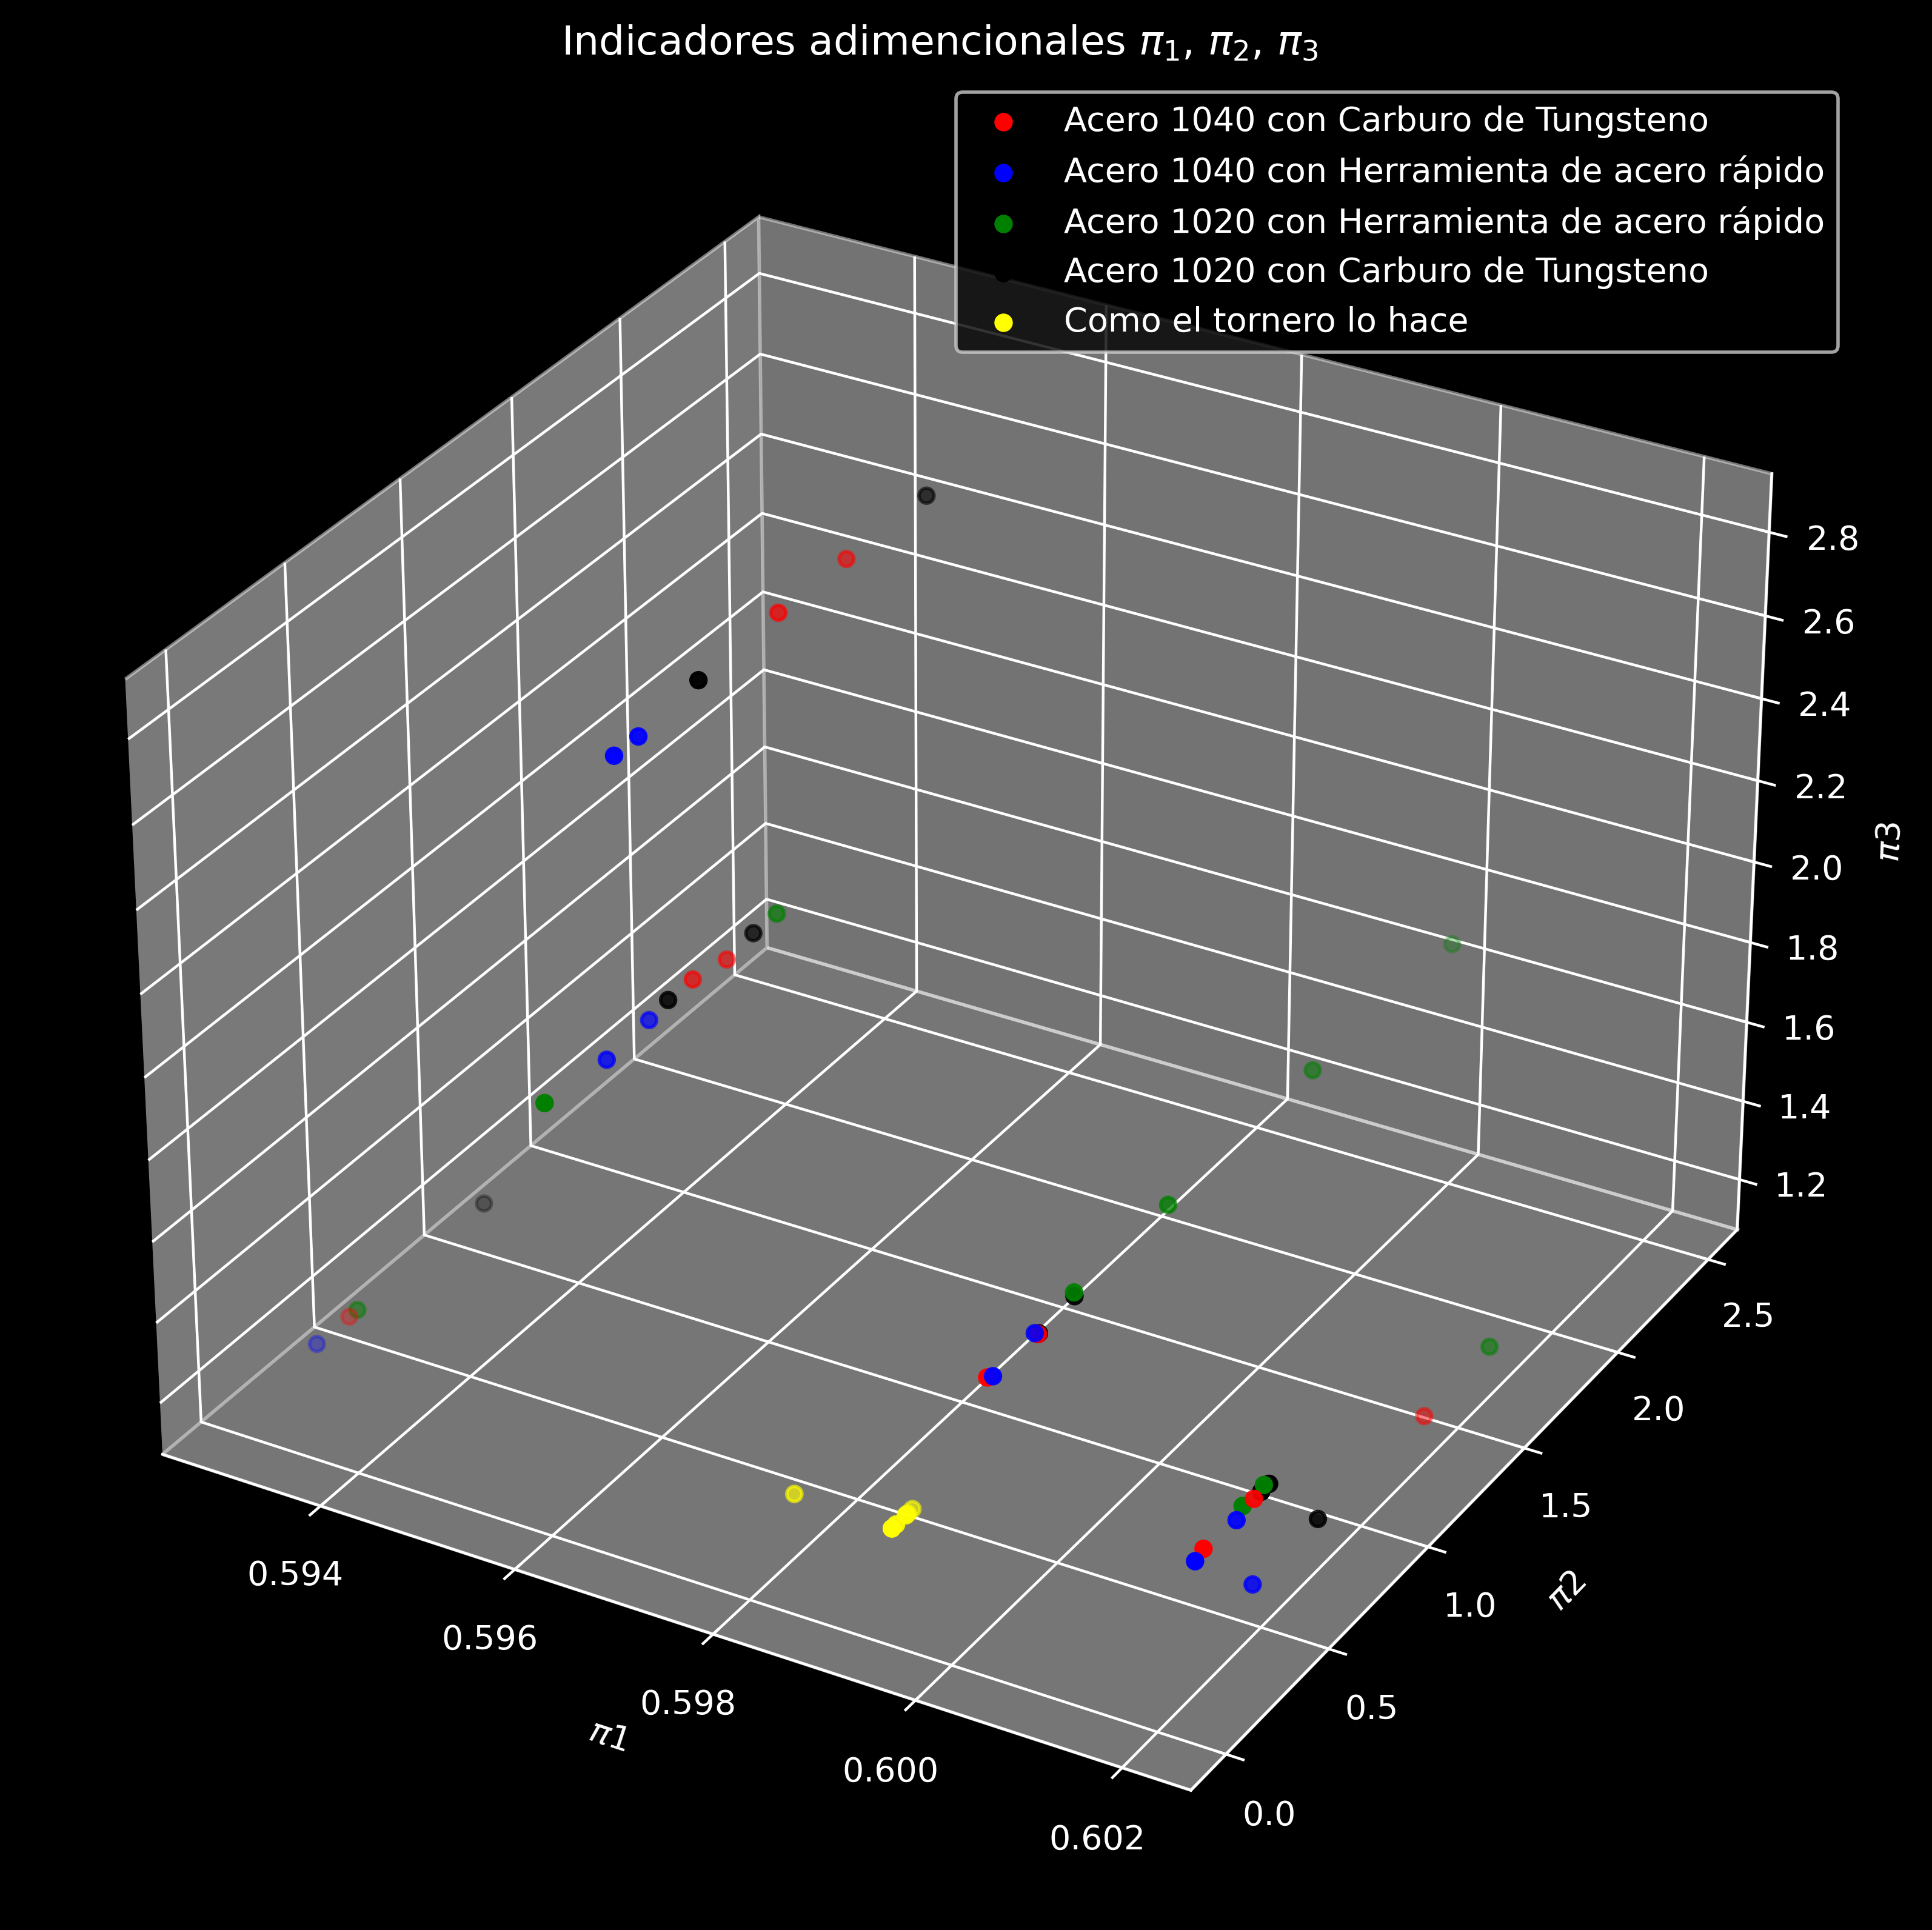

In [37]:
# make a 3d plot
fig = plt.figure(figsize=(10,10),dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(steel_1040_carbide['Pi 1'],steel_1040_carbide['Pi 2'],steel_1040_carbide['Pi 3'],color='red',label='Acero 1040 con Carburo de Tungsteno')
ax.scatter(steel_1040_fast['Pi 1'],steel_1040_fast['Pi 2'],steel_1040_fast['Pi 3'],color='blue',label='Acero 1040 con Herramienta de acero rápido')
ax.scatter(steel_1020_fast['Pi 1'],steel_1020_fast['Pi 2'],steel_1020_fast['Pi 3'],color='green',label='Acero 1020 con Herramienta de acero rápido')
ax.scatter(steel_1020_carbide['Pi 1'],steel_1020_carbide['Pi 2'],steel_1020_carbide['Pi 3'],color='black',label='Acero 1020 con Carburo de Tungsteno')
ax.scatter(machinist['Pi 1'],machinist['Pi 2'],machinist['Pi 3'],color='yellow',label='Como el tornero lo hace')
ax.set_xlabel(r'$\pi 1$')
ax.set_ylabel(r'$\pi 2$')
ax.set_zlabel(r'$\pi 3$')
ax.title.set_text(r'Indicadores adimencionales $\pi_1$, $\pi_2$, $\pi_3$')
ax.legend() 




> Concatenacion de los datos y creación de maya

In [38]:
pi_1_steel_1040_carbide=steel_1040_carbide['Pi 1']
pi_2_steel_1040_carbide=steel_1040_carbide['Pi 2']
pi_3_steel_1040_carbide=steel_1040_carbide['Pi 3']
pi_1_steel_1040_fast=steel_1040_fast['Pi 1']
pi_2_steel_1040_fast=steel_1040_fast['Pi 2']
pi_3_steel_1040_fast=steel_1040_fast['Pi 3']
pi_1_steel_1020_fast=steel_1020_fast['Pi 1']
pi_2_steel_1020_fast=steel_1020_fast['Pi 2']
pi_3_steel_1020_fast=steel_1020_fast['Pi 3']
pi_1_steel_1020_carbide=steel_1020_carbide['Pi 1']
pi_2_steel_1020_carbide=steel_1020_carbide['Pi 2']
pi_3_steel_1020_carbide=steel_1020_carbide['Pi 3']
pi_1_machinist=machinist['Pi 1']
pi_2_machinist=machinist['Pi 2']
pi_3_machinist=machinist['Pi 3']

pi_1=np.concatenate((pi_1_steel_1040_carbide,pi_1_steel_1040_fast,pi_1_steel_1020_fast,pi_1_steel_1020_carbide,pi_1_machinist))
pi_2=np.concatenate((pi_2_steel_1040_carbide,pi_2_steel_1040_fast,pi_2_steel_1020_fast,pi_2_steel_1020_carbide,pi_2_machinist))
pi_3=np.concatenate((pi_3_steel_1040_carbide,pi_3_steel_1040_fast,pi_3_steel_1020_fast,pi_3_steel_1020_carbide,pi_3_machinist))
points=np.array([pi_1,pi_2])
# makea a 3d interpolation
grid_x, grid_y = np.mgrid[np.min(pi_1)-0.001:np.max(pi_1)+0.001:1000j, np.min(pi_2):np.max(pi_2)+0.01:1000j]






Regreción 3D para hallar la superfice de mayor ajuste a los datos de la forma:
$$z(x,y)=ax^by^c+dx^{\left (c+1\right)}y^{\left (b+1\right)}+fx^{\left(c+2\right)}y^{\left(b+2\right)}$$

In [39]:
# Define a cubic function to optimize

def curve(data,a,b,c,d,f):
    x=data[0]
    y=data[1]
    return a*x**b*y**c+d*x**(b+1)*y**(c+1)+f*x**(b+2)*y**(c+2)

parameters,cov=curve_fit(curve,points,pi_3,maxfev=100000000)
z=curve([grid_x,grid_y],*parameters)

perr=np.sqrt(abs(np.diag(cov)))
parameters_labels=['a','b','c','d','f']
parameters_df=pd.DataFrame(index=parameters_labels)
parameters_df['Valor']=parameters
parameters_df['Error[dev std]']=perr
# Set index titles
parameters_df.index.name='Parametros'
parameters_df.head()

Valor  Error[dev std]
Parametros                           
a            0.000001        0.000007
b          -22.601403        8.145059
c           -0.551889        0.303529
d            0.000034        0.000143
f           -0.000011        0.000049

Grafica de la superfice de mayor ajuste

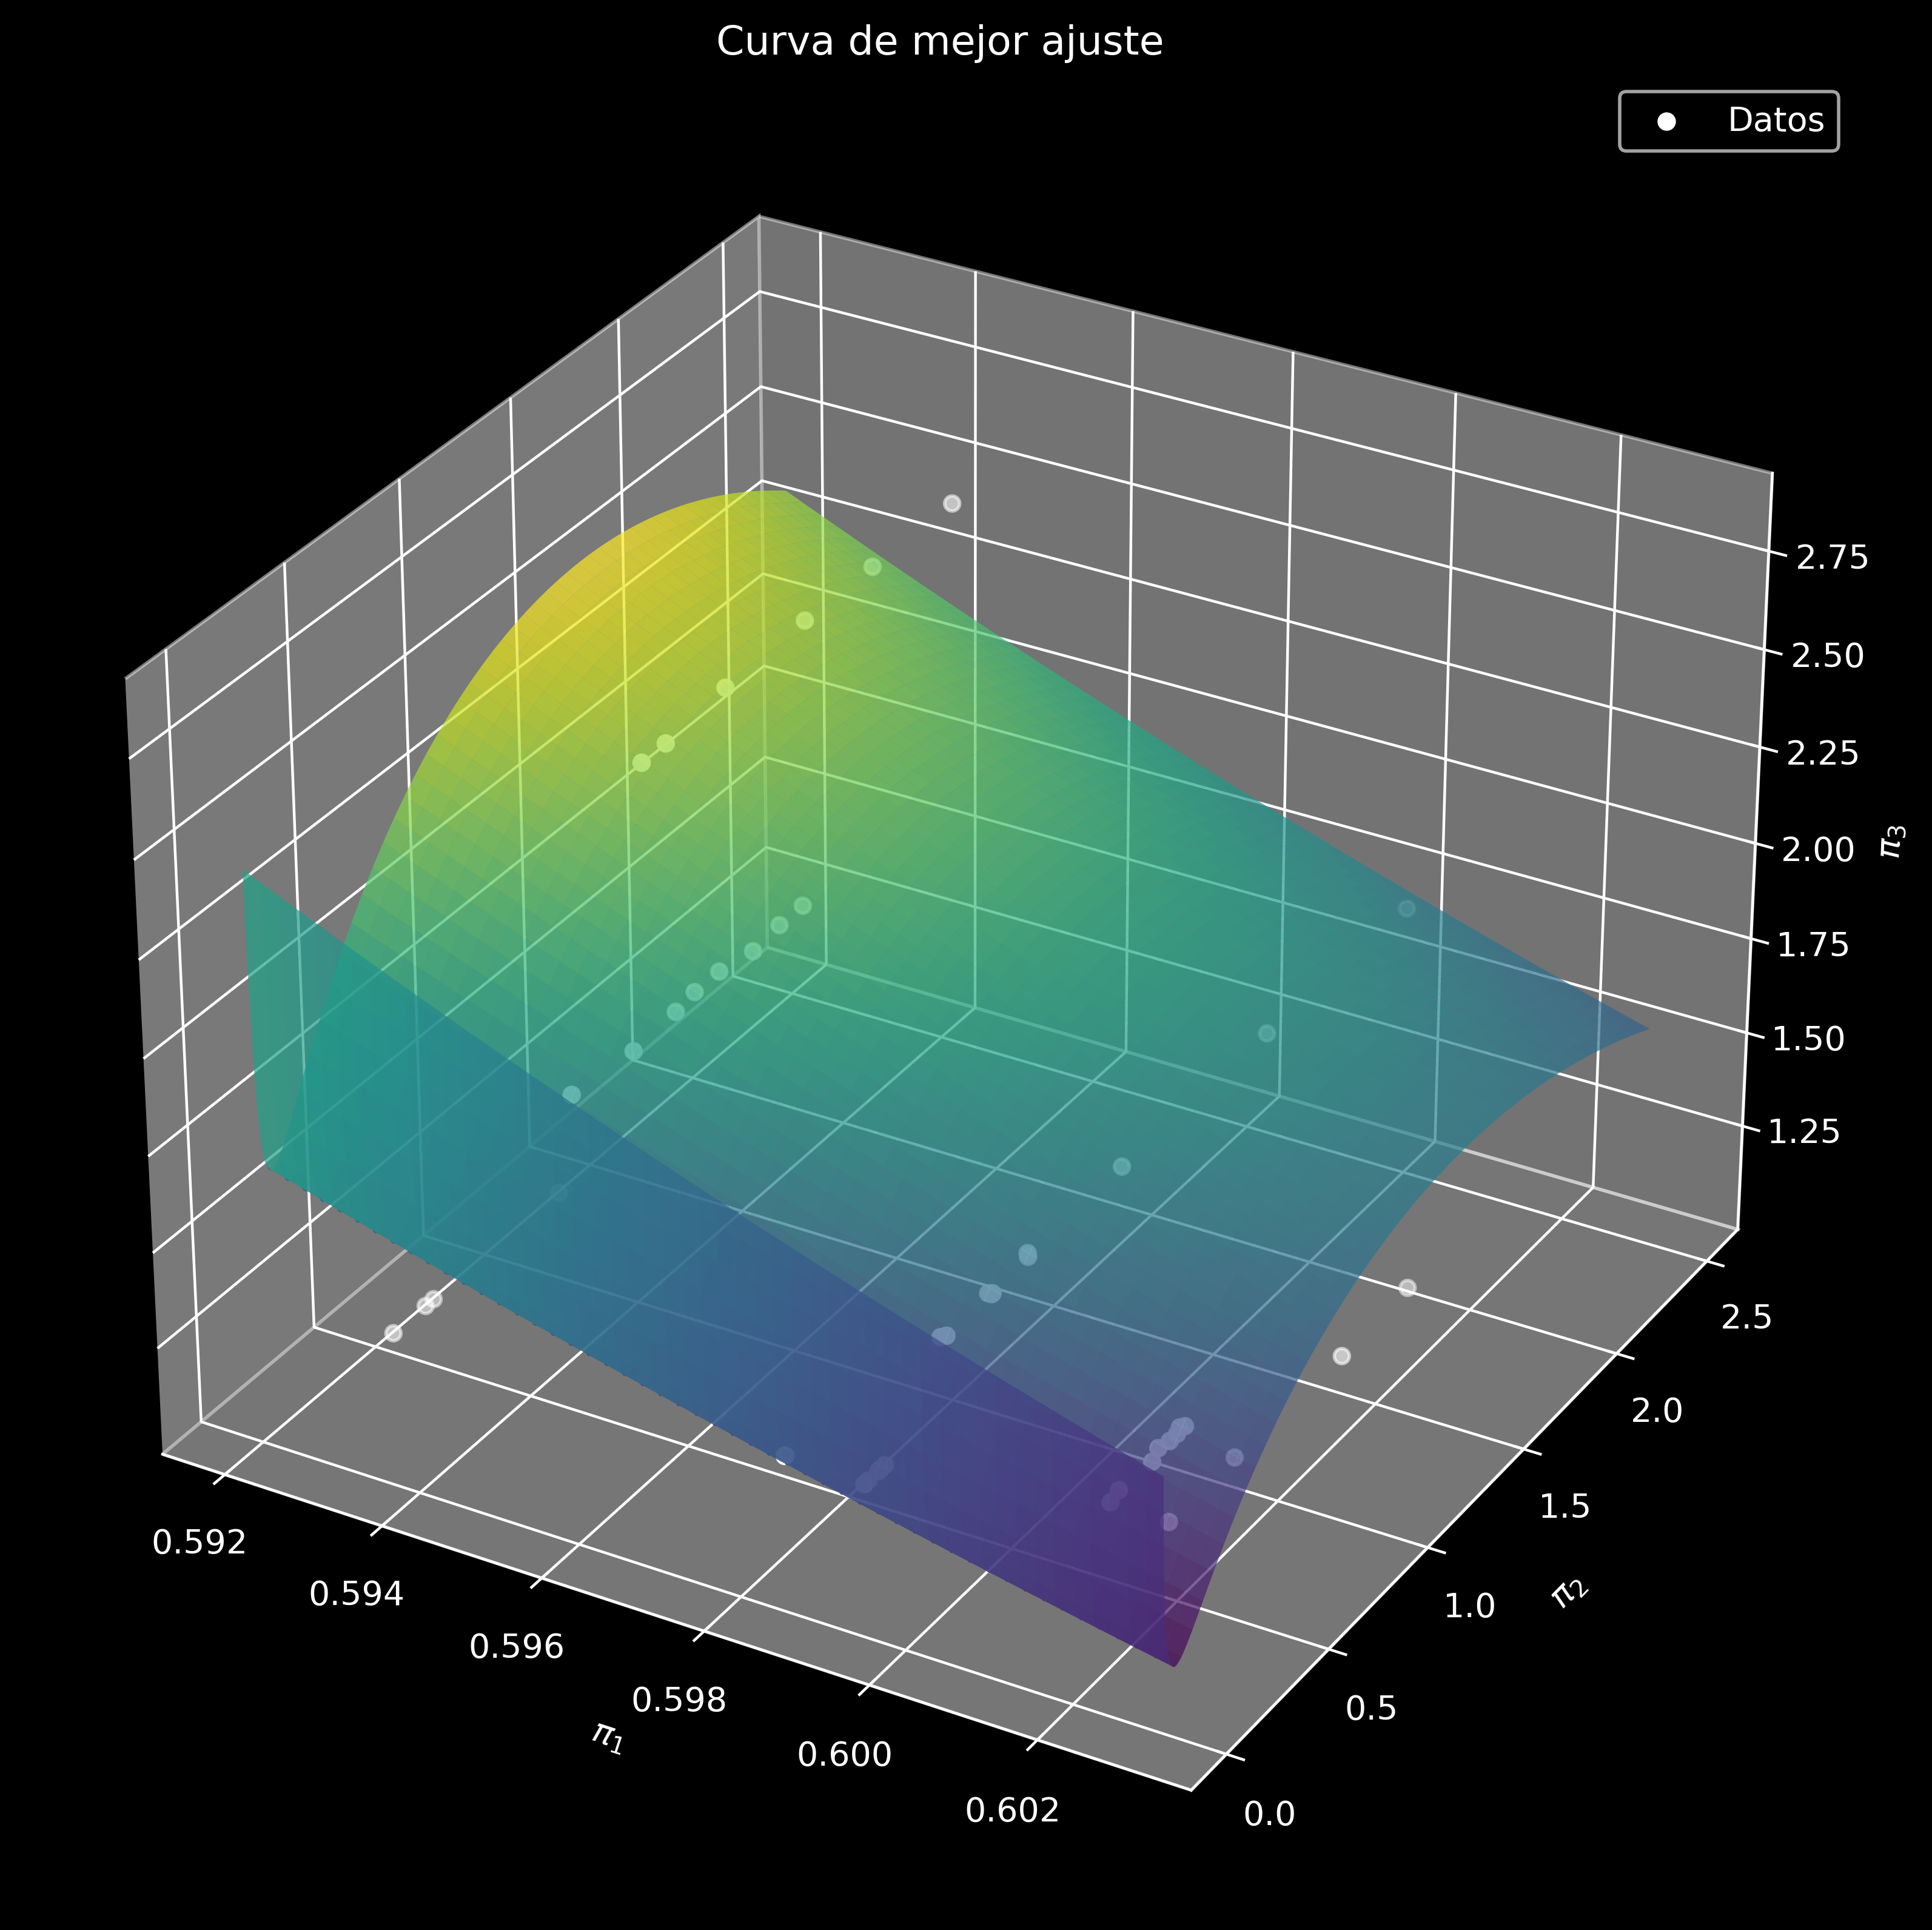

In [40]:
fig=plt.figure(figsize=(10,10),dpi=400)
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(grid_x,grid_y,z,alpha=0.7,cmap='viridis')
ax.scatter(pi_1,pi_2,pi_3,color='white',label='Datos')
ax.set_xlabel(r'$\pi_1$')
ax.set_ylabel(r'$\pi_2$')
ax.set_zlabel(r'$\pi_3$')
ax.title.set_text(r'Curva de mejor ajuste')
ax.legend()
plt.show()


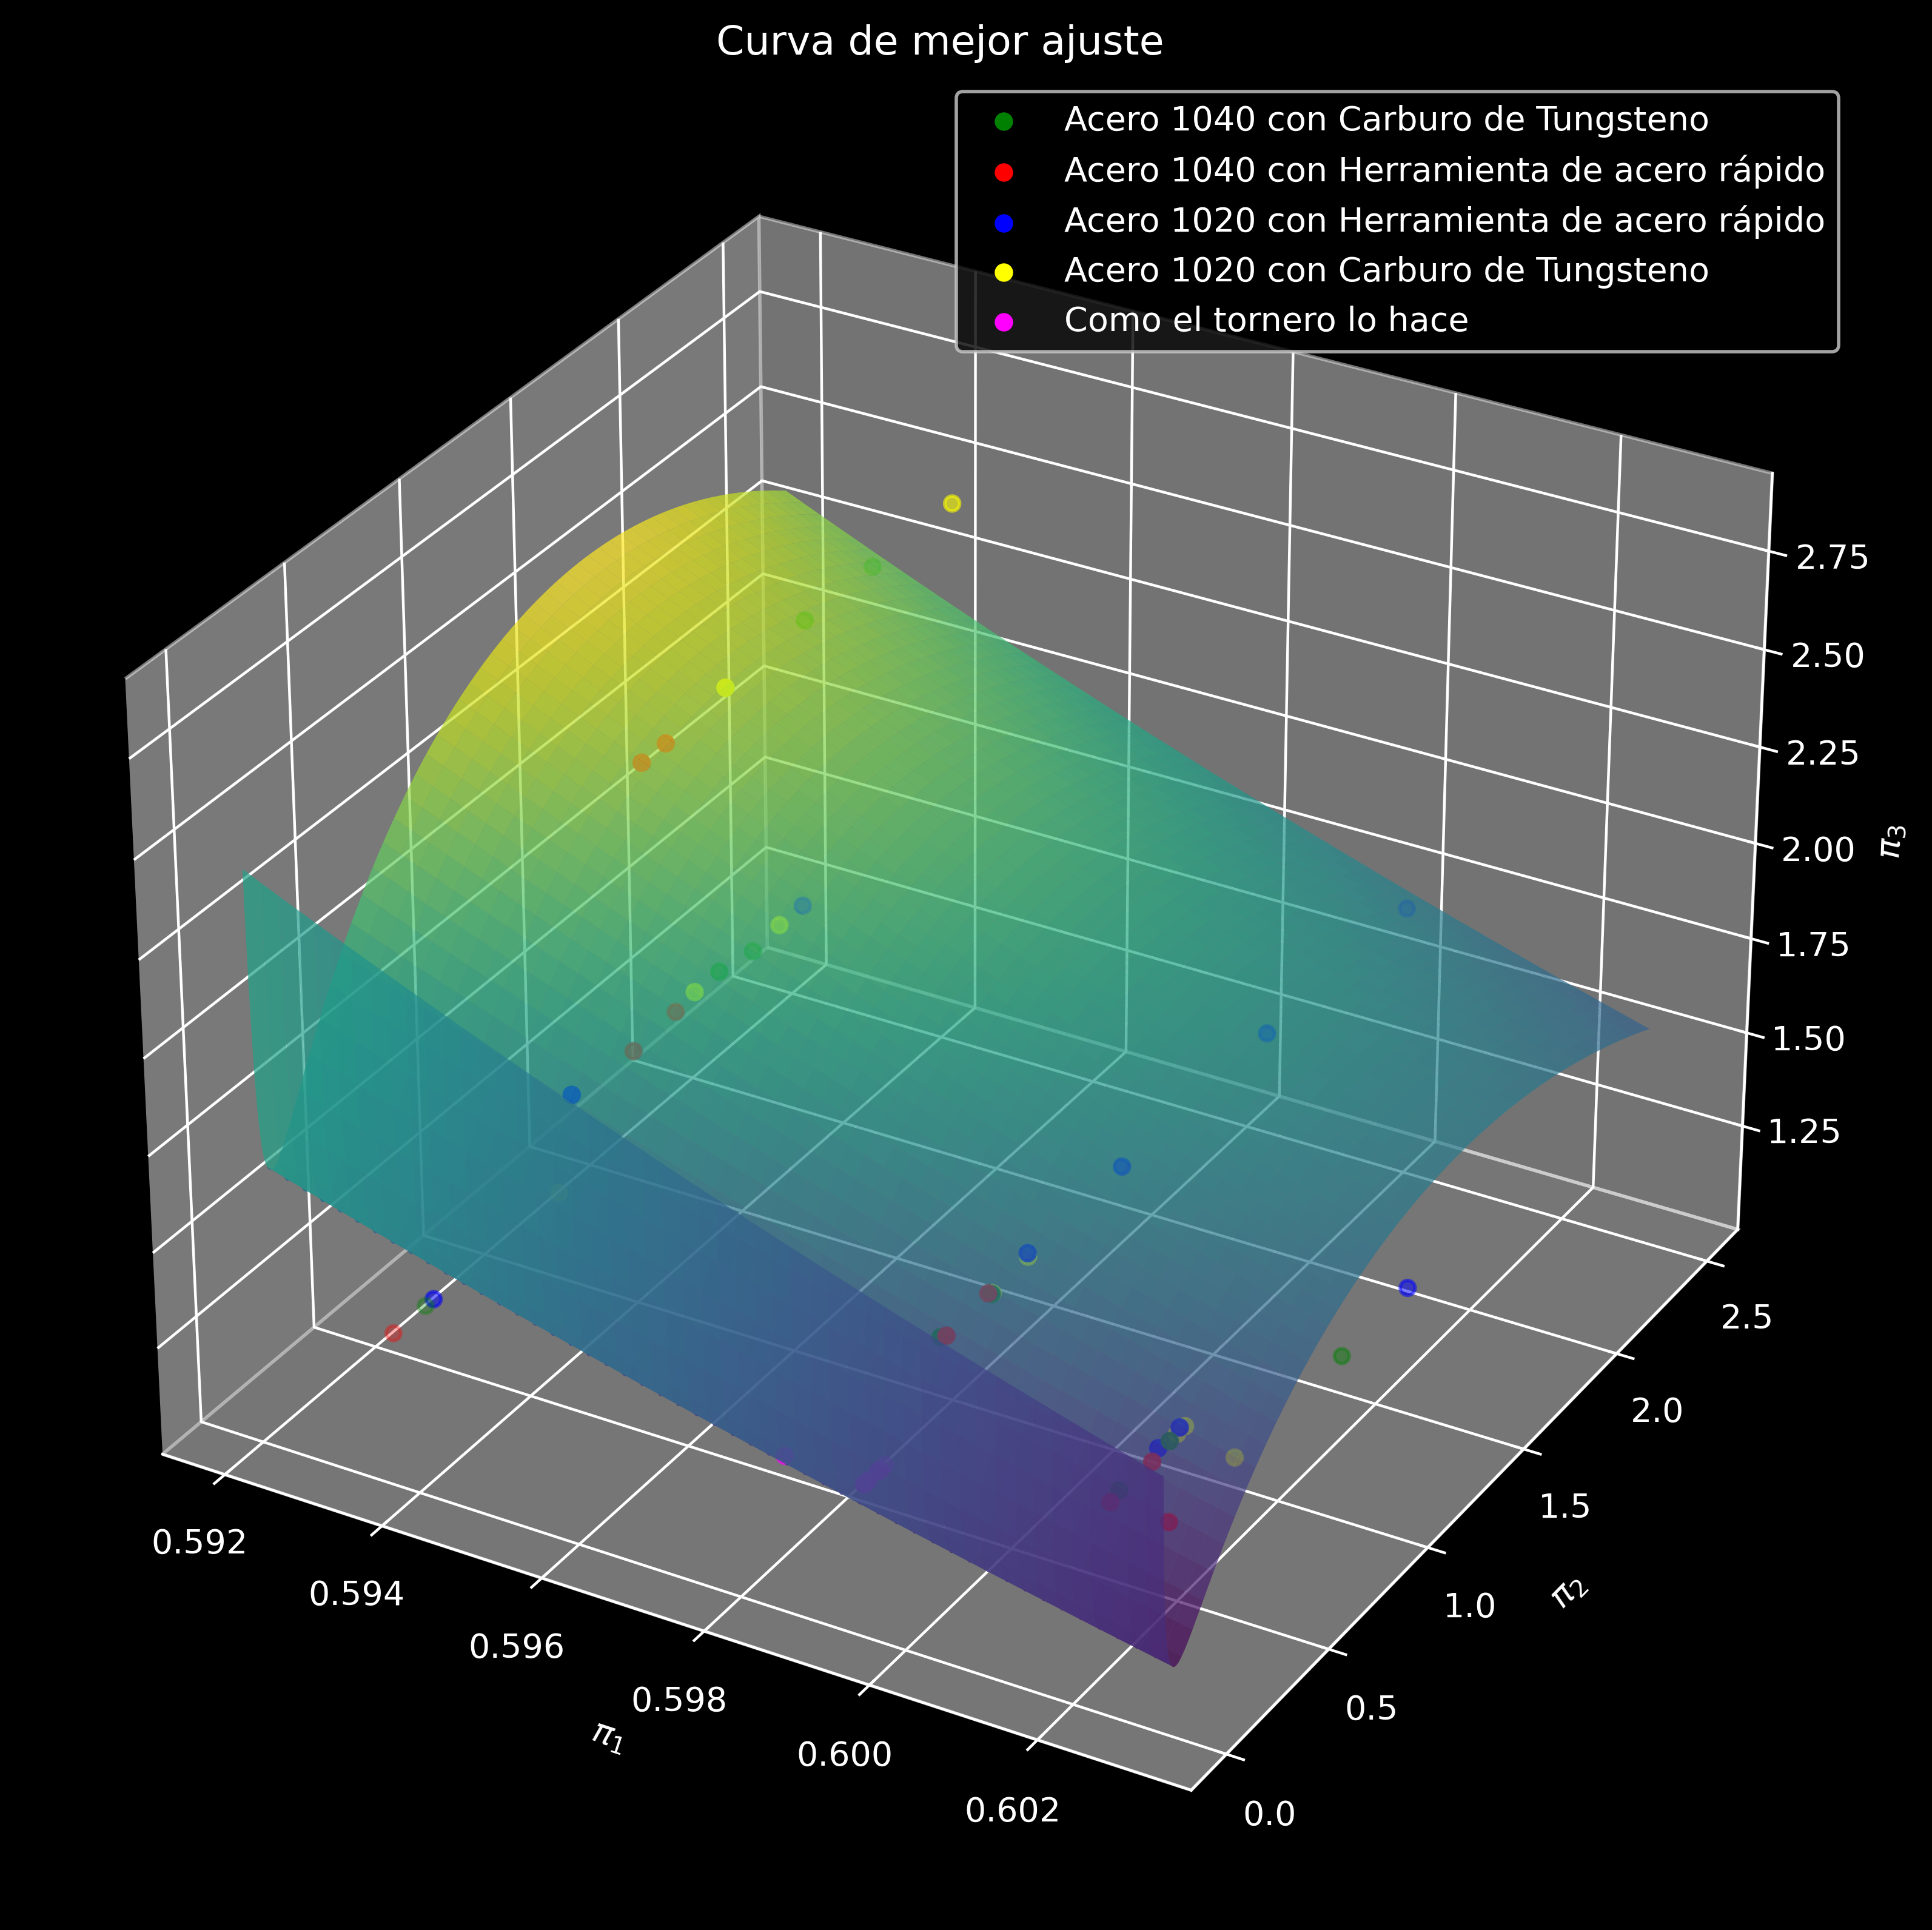

In [41]:
fig=plt.figure(figsize=(10,10),dpi=400)
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(grid_x,grid_y,z,alpha=0.7,cmap='viridis')
ax.scatter(pi_1_steel_1040_carbide,pi_2_steel_1040_carbide,pi_3_steel_1040_carbide,color='green',label='Acero 1040 con Carburo de Tungsteno')
ax.scatter(pi_1_steel_1040_fast,pi_2_steel_1040_fast,pi_3_steel_1040_fast,color='red',label='Acero 1040 con Herramienta de acero rápido')
ax.scatter(pi_1_steel_1020_fast,pi_2_steel_1020_fast,pi_3_steel_1020_fast,color='blue',label='Acero 1020 con Herramienta de acero rápido')
ax.scatter(pi_1_steel_1020_carbide,pi_2_steel_1020_carbide,pi_3_steel_1020_carbide,color='yellow',label='Acero 1020 con Carburo de Tungsteno')
ax.scatter(pi_1_machinist,pi_2_machinist,pi_3_machinist,color='magenta',label='Como el tornero lo hace')
ax.set_xlabel(r'$\pi_1$')
ax.set_ylabel(r'$\pi_2$')
ax.set_zlabel(r'$\pi_3$')
ax.title.set_text(r'Curva de mejor ajuste')
ax.legend()
plt.show()


Grafica de contorno

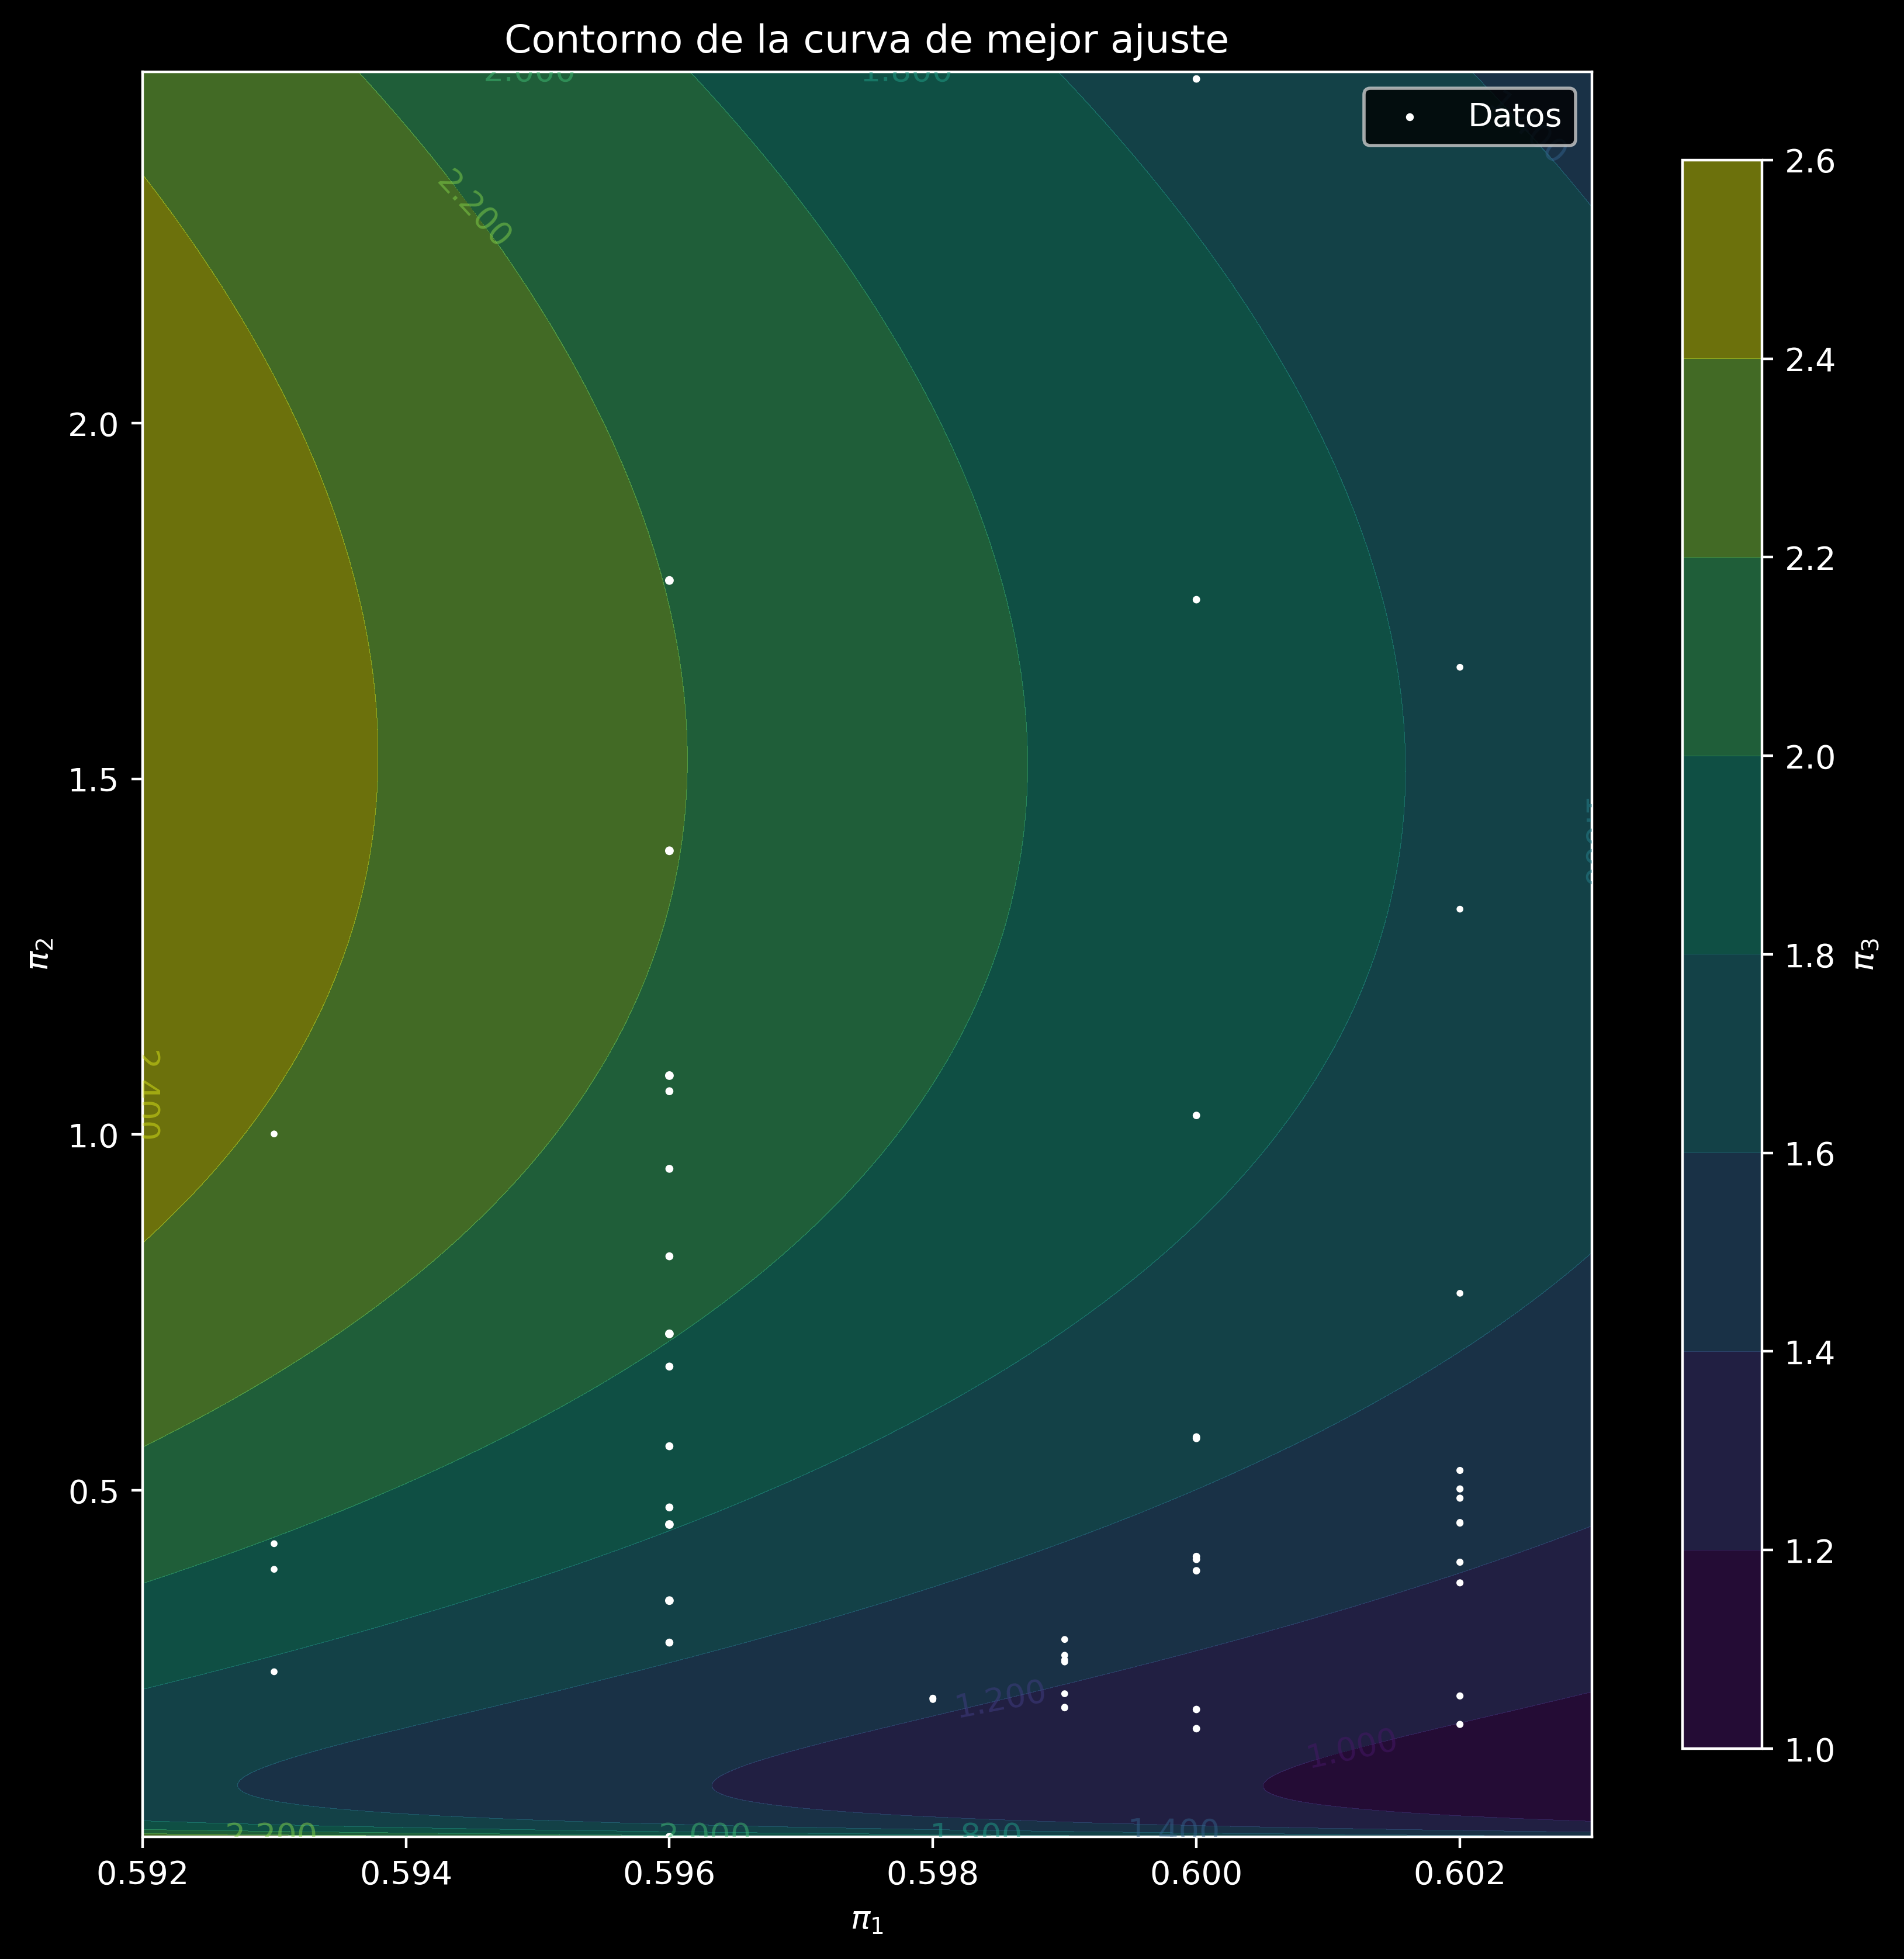

In [42]:
fig,ax=plt.subplots(figsize=(10,10),dpi=400)
cs=ax.contourf(grid_x,grid_y,z,alpha=0.5,cmap='viridis')
ax.clabel(cs,inline=1,fontsize=10)
cb=fig.colorbar(cs,ax=ax,shrink=0.9)
cb.set_label(r'$\pi_3$')
plt.scatter(pi_1,pi_2,pi_3,color='white',label='Datos')
plt.xlabel(r'$\pi_1$')
plt.ylabel(r'$\pi_2$')
plt.title(r'Contorno de la curva de mejor ajuste')
plt.legend()
plt.show()


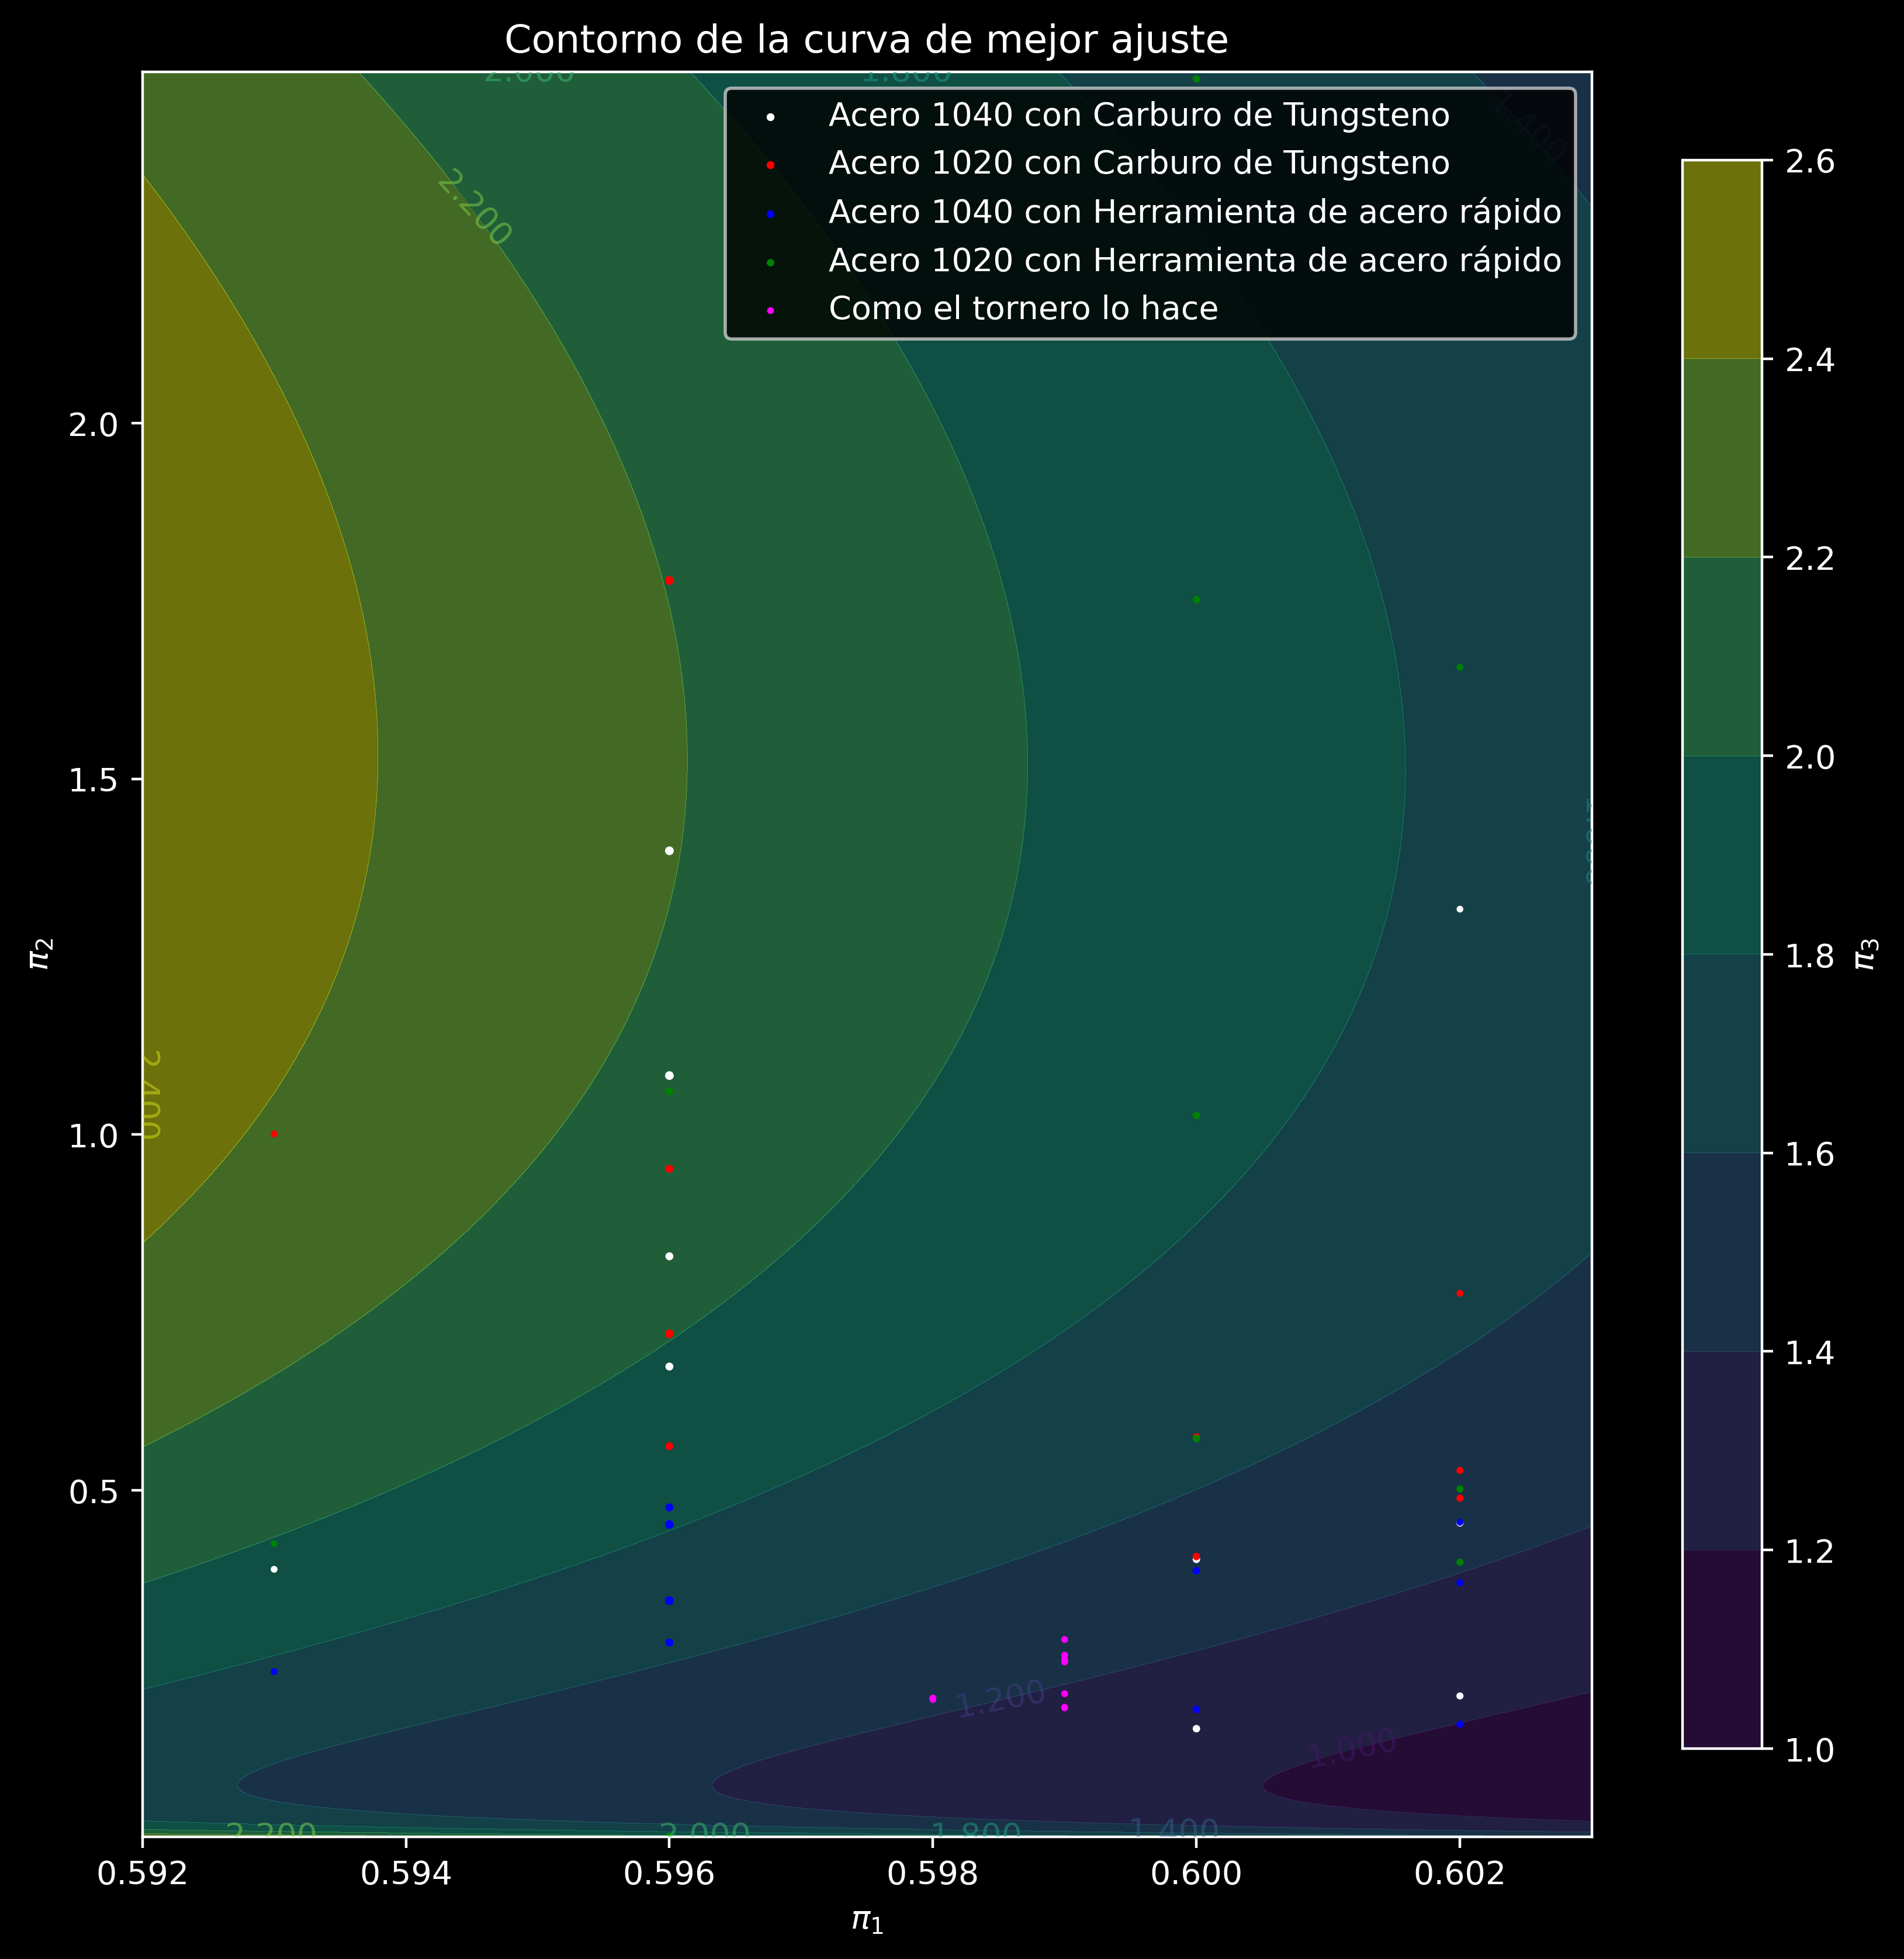

In [43]:
fig,ax=plt.subplots(figsize=(10,10),dpi=400)
cs=ax.contourf(grid_x,grid_y,z,alpha=0.5,cmap='viridis')
ax.clabel(cs,inline=1,fontsize=10)
cb=fig.colorbar(cs,ax=ax,shrink=0.9)
cb.set_label(r'$\pi_3$',color='white')
plt.scatter(pi_1_steel_1040_carbide,pi_2_steel_1040_carbide,pi_3_steel_1040_carbide,color='white',label='Acero 1040 con Carburo de Tungsteno')
plt.scatter(pi_1_steel_1020_carbide,pi_2_steel_1020_carbide,pi_3_steel_1020_carbide,color='red',label='Acero 1020 con Carburo de Tungsteno')
plt.scatter(pi_1_steel_1040_fast,pi_2_steel_1040_fast,pi_3_steel_1040_fast,color='blue',label='Acero 1040 con Herramienta de acero rápido')
plt.scatter(pi_1_steel_1020_fast,pi_2_steel_1020_fast,pi_3_steel_1020_fast,color='green',label='Acero 1020 con Herramienta de acero rápido')
plt.scatter(pi_1_machinist,pi_2_machinist,pi_3_machinist,color='magenta',label='Como el tornero lo hace')
plt.xlabel(r'$\pi_1$')
plt.ylabel(r'$\pi_2$')
plt.title(r'Contorno de la curva de mejor ajuste')
plt.legend()
plt.show()

# Optimización 

### Nomenclatura

Símbolo  | Descripción
-------- | ----------------------------------------
$T_p$    | Tiempo de preparación de la máquina (s).
$T_i$    | Tiempo de Improductividad (s).
$T_{cd}$ | Tiempo de carga y descarga de material (s).
$T_{t}$   | Tiempo de cambio de la herramienta (s).
$C_p$    | Costo de preparación de la máquina ($).
$C_i$    | Costo de improductividad ($).
$C_p$    | Costo de preparación de la máquina ($).
$C_f$    | Costo del fluido de corte ($).
$C_{om}$ | Costo de operacion de la máquina ($).
$V_b$    | Desgaste de operación  de la máquina ($\mu m$).
$A_v$    | Velocidad de avance del movimiento
$P_c$    | Profundidad de corte (mm)
$L_m$    | Longitud mecanizada de material (mm)
$T$      | Tiempo efectivo de mecanizado (min)
$V_{MR}$ | Volumen de material retirado (mm^3)
$T_{OHP}$| tiempo de operación de la herramienta (s)
$C_{MP}$ | Costo de materia prima ($).
$V_{MP}$ | Volumen de materia prima ($mm^3$)



$$\pi_1= \frac{\frac{C_p+C_i+C_f+C_{om}}{V_{MR}}}{\frac{C_{MP}}{V_{MP}}}$$

$$C_1=C_p+C_i+C_f+C_{om}$$
$$C_{HF}=\left(\frac{C_H\times T_{OHP}}{NF\times T_{TM}}\right)$$
$$\pi_2=\frac{\frac{C_1}{V_b}}{\frac{C_{HF}}{L_m}}$$

$$\pi_3=\frac{V_v}{V_p}$$